In [2]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO

import fnmatch

In [3]:
output_dir = list(os.listdir('../output'))

In [4]:
df_template = pd.read_csv(StringIO("""package,time_elapsed,classifier,sample_size,strategy,dataset,accuracy_history,f1_history,id_bag"""))

In [5]:
df_all = df_template[:]
for file in output_dir:
    df_all = pd.concat([df_all,pd.read_csv('../output/' + file)])

In [6]:
datasets = list(os.listdir('../datasets'))

In [7]:
df_all['cost'] = df_all.index

In [8]:
pyhard_datasets = df_all[df_all.strategy == 'Lowest N1 Sampling']['dataset'].unique()

In [9]:
df_all = df_all[df_all.dataset.isin(pyhard_datasets)]

### Groupby por dataset

In [10]:
df = df_all[:]

In [11]:
df["approach"] = df.apply(lambda x: "agnostic" if ((x.package == "upyhard") | (x.strategy == "Random Sampling"))  else "non agnostic", axis=1)

/mnt/c/Users/ahmou/Onedrive/Documentos/ubuntu_wd/act_len/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
# explode pelas colunas accuracy_history e f1_history
df = df.set_index(['package','time_elapsed','classifier','sample_size','strategy','dataset']).apply(pd.Series.explode).reset_index()

# explode retorna coluna como object, logo é necessário transformar em número
df['f1_history'] = pd.to_numeric(df['f1_history'])
df['accuracy_history'] = pd.to_numeric(df['accuracy_history'])

In [13]:
df \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset                          package strategy                     classifier                 
1526_wall-robot-navigation       modAL   Expected Model Change        C4.5            1.444676   
                                         Query by Committee           RF            742.031594   
                                         Uncertain Sampling           C4.5            0.688956   
                                         Query by Committee           C4.5           17.729628   
                                         Expected Model Change        RF             47.630934   
...                                                                                        ...   
1475_first-order-theorem-proving Pyhard  Highest LSC Sampling         NB            156.435788   
                                 modAL   Uncertain Sampling           NB              3.981357   
                                 Pyhard  Highest Usefulness Sampling  NB            149.874417   
                                 modAL   Query by Committee           NB            201.706390   
                                 Pyhard  Lowest H, Highest U Sampling NB            151.576080   

                                                                                  sample_size  \
dataset                          package strategy                     classifier                
1526_wall-robot-navigation       modAL   Expected Model Change        C4.5           0.330242   
                                         Query by Committee           RF             2.701979   
                                         Uncertain Sampling           C4.5           0.100073   
                                         Query by Committee           C4.5           2.701979   
                                         Expected Model Change        RF             0.360264   
...                                                                                       ...   
1475_first-order-theorem-proving Pyhard  Highest LSC Sampling         NB             0.997344   
                                 modAL   Uncertain Sampling           NB             0.200065   
                                 Pyhard  Highest Usefulness Sampling  NB             0.997344   
                                 modAL   Query by Committee           NB             2.700883   
                                 Pyhard  Lowest H, Highest U Sampling NB             0.997344   

                                                                                  accuracy_history  \
dataset                          package strategy                     classifier                     
1526_wall-robot-navigation       modAL   Expected Model Change        C4.5                0.999826   
                                         Query by Committee           RF                  0.999826   
                                         Uncertain Sampling           C4.5                0.999451   
                                         Query by Committee           C4.5                0.999451   
                                         Expected Model Change        RF                  0.999451   
...                                                                                            ...   
1475_first-order-theorem-proving Pyhard  Highest LSC Sampling         NB                  0.189714   
                                 modAL   Uncertain Sampling           NB                  0.181115   
                                 Pyhard  Highest Usefulness Sampling  NB                  0.178741   
                                 modAL   Query by Committee           NB                  0.180366   
                                 Pyhard  Lowest H, Highest U Sampling NB                  0.163373   

                                                                                  f1_history  
dataset                          package strategy                     classifier              
1526_wall-robot-navigation  

In [14]:
df_all[df_all.strategy != 'Expected Error Reduction'] \
.drop(['dataset', 'id_bag','cost'], axis=1) \
.groupby(['package','strategy', 'classifier']) \
.mean() \
.sort_values("f1_history", ascending = False)

time_elapsed  sample_size  \
package strategy                     classifier                              
Pyhard  Highest LSC Sampling         RF            255.104783     0.992642   
        Highest Usefulness Sampling  RF            260.209121     0.992642   
        Lowest H, Highest U Sampling RF            265.482157     0.992642   
modAL   Query by Committee           RF           1110.303763     2.710812   
upyhard Lowest F3 Sampling           RF            271.965442     0.992837   
Pyhard  Lowest Harmfulness Sampling  RF            279.860282     0.992642   
        Lowest N1 Sampling           RF            246.434505     0.992642   
        Highest Usefulness Sampling  C4.5          162.001804     0.992837   
        Lowest H, Highest U Sampling C4.5          164.179271     0.992837   
modAL   Uncertain Sampling           RF             26.101846     0.327425   
Pyhard  Highest LSC Sampling         C4.5          169.603389     0.992682   
        Lowest N2 Sampling           RF            218.860215     0.992167   
modAL   Expected Model Change        RF             68.744945     0.641788   
        Query by Committee           C4.5           77.370397     2.710812   
Pyhard  Lowest N2 Sampling           C4.5          164.889156     0.992167   
upyhard Lowest F3 Sampling           C4.5          175.036746     0.992837   
Pyhard  Lowest Harmfulness Sampling  C4.5          160.507164     0.992837   
        Lowest N1 Sampling           C4.5          169.581988     0.992642   
modAL   Expected Model Change        C4.5            7.796701     0.646815   
Pyhard  Lowest N2 Sampling           5NN           173.327725     0.992167   
modAL   Random Sampling              RF             47.826894     1.037437   
        Uncertain Sampling           C4.5            1.977887     0.100583   
Pyhard  Highest LSC Sampling         5NN           223.695774     0.992837   
        Lowest H, Highest U Sampling 5NN           219.576141     0.992837   
        Highest Usefulness Sampling  5NN           222.207563     0.992837   
modAL   Random Sampling              C4.5            3.720984     1.037437   
        Uncertain Sampling           5NN            27.307936     0.331663   
Pyhard  Lowest Harmfulness Sampling  5NN           220.806396     0.992837   
        Lowest N1 Sampling           5NN           222.308045     0.992837   
modAL   Expected Model Change        5NN            56.296528     0.620760   
upyhard Lowest F3 Sampling           5NN           233.713729     0.992837   
modAL   Query by Committee           5NN           783.294050     2.710812   
        Expected Model Change        NB              7.850775     0.496853   
        Random Sampling              5NN            25.738409     1.037437   
        Query by Committee           NB             82.698060     2.710812   
        Uncertain Sampling           NB              2.693447     0.240451   
Pyhard  Highest LSC Sampling         NB            264.940252     0.992642   
modAL   Random Sampling              NB              4.411481     1.037437   
Pyhard  Lowest N1 Sampling           NB            164.160633     0.992642   
        Lowest H, Highest U Sampling NB            166.985903     0.992642   
        Highest Usefulness Sampling  NB            164.983117     0.992642   
        Lowest Harmfulness Sampling  NB            170.675768     0.992642   
upyhard Lowest F3 Sampling           NB            175.602290     0.992837   
Pyhard  Lowest N2 Sampling           NB            183.384149     0.992167   

                                                 accuracy_history  f1_history  
package strategy                     classifier                                
Pyhard  Highest LSC Sampling         RF                  0.857571    0.878159  
        Highest Usefulness Sampling  RF                  0.854828    0.874326  
        Lowest H, Highest U Sampling RF                  0.854984    0.873444  
modAL   Query by Committee           RF                  0.8

In [15]:
df_all \
.drop(['id_bag','cost'], axis=1) \
.groupby(['dataset','package','strategy', 'classifier']) \
.std() \
.sort_values("f1_history", ascending = False)

time_elapsed  \
dataset       package strategy                     classifier                 
1050_pc3      Pyhard  Lowest H, Highest U Sampling NB              2.386096   
              upyhard Lowest F3 Sampling           NB              2.564834   
              Pyhard  Lowest Harmfulness Sampling  NB              1.048675   
                      Highest LSC Sampling         NB              0.825930   
              modAL   Uncertain Sampling           NB              0.085508   
...                                                                     ...   
316_yeast_ml8 modAL   Random Sampling              5NN             0.441511   
1056_mc1      upyhard Lowest F3 Sampling           5NN             2.357723   
1069_pc2      Pyhard  Highest Usefulness Sampling  5NN            12.552600   
                      Highest LSC Sampling         5NN             4.127885   
              modAL   Random Sampling              5NN             1.046856   

                                                               sample_size  \
dataset       package strategy                     classifier                
1050_pc3      Pyhard  Lowest H, Highest U Sampling NB             0.000000   
              upyhard Lowest F3 Sampling           NB             0.000000   
              Pyhard  Lowest Harmfulness Sampling  NB             0.000000   
                      Highest LSC Sampling         NB             0.000000   
              modAL   Uncertain Sampling           NB             0.020325   
...                                                                    ...   
316_yeast_ml8 modAL   Random Sampling              5NN            0.000000   
1056_mc1      upyhard Lowest F3 Sampling           5NN            0.000000   
1069_pc2      Pyhard  Highest Usefulness Sampling  5NN            0.000000   
                      Highest LSC Sampling         5NN            0.000000   
              modAL   Random Sampling              5NN            0.000000   

                                                               accuracy_history  \
dataset       package strategy                     classifier                     
1050_pc3      Pyhard  Lowest H, Highest U Sampling NB                  0.302925   
              upyhard Lowest F3 Sampling           NB                  0.296758   
              Pyhard  Lowest Harmfulness Sampling  NB                  0.279017   
                      Highest LSC Sampling         NB                  0.286490   
              modAL   Uncertain Sampling           NB                  0.302601   
...                                                                         ...   
316_yeast_ml8 modAL   Random Sampling              5NN                 0.000000   
1056_mc1      upyhard Lowest F3 Sampling           5NN                 0.000000   
1069_pc2      Pyhard  Highest Usefulness Sampling  5NN                 0.000000   
                      Highest LSC Sampling         5NN                 0.000000   
              modAL   Random Sampling              5NN                 0.000000   

                                                               f1_history  
dataset       package strategy                     classifier              
1050_pc3      Pyhard  Lowest H, Highest U Sampling NB            0.341029  
              upyhard Lowest F3 Sampling           NB            0.334108  
              Pyhard  Lowest Harmfulness Sampling  NB            0.322793  
                      Highest LSC Sampling         NB            0.317848  
              modAL   Uncertain Sampling           NB            0.317316  
...                                                                   ...  
316_yeast_ml8 modAL   Random Sampling              5NN           0.000000  
1056_mc1      upyhard Lowest F3 Sampling           5NN           0.000000  
1069_pc2      Pyhard  Highest Usefulness Sampling  5NN           0.000000  
                      Highest LSC Sampling         5NN           0.000000  
              modAL   Random

## Boxplot

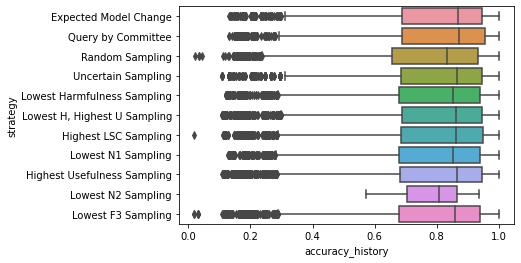

In [16]:
ax = sns.boxplot(data=df_all, x="accuracy_history", y="strategy", orient="h")

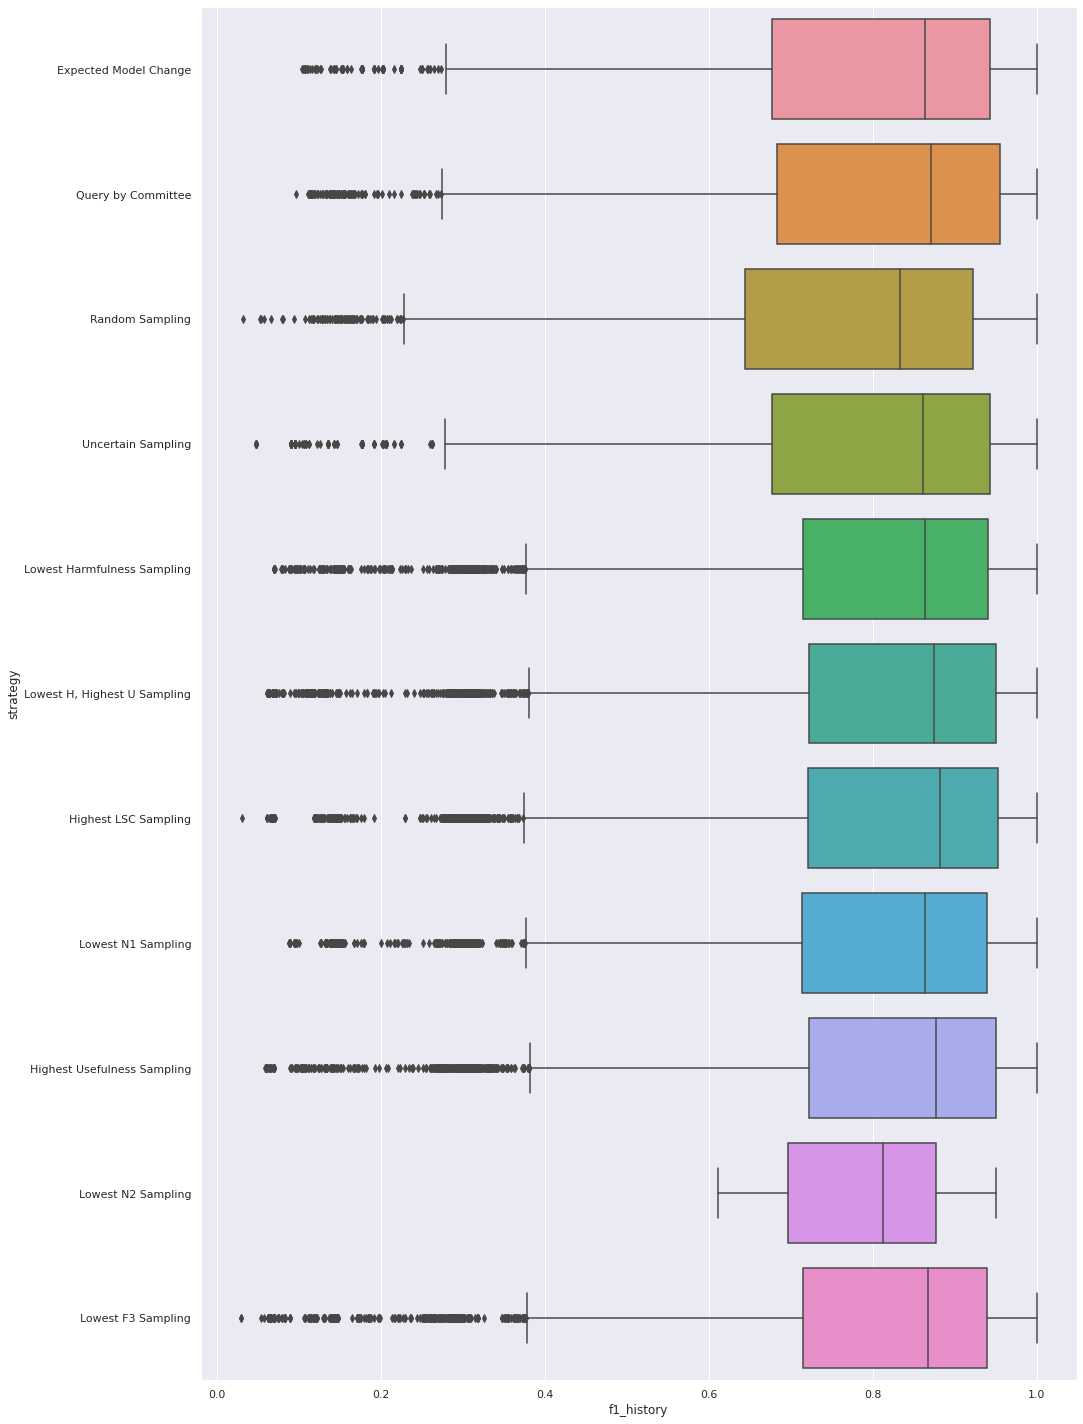

In [17]:
sns.set(rc={'figure.figsize':(15.7,25.27)})
ax = sns.boxplot(data=df_all, x="f1_history", y="strategy", orient="h"
                )

## Testes (lineplot)

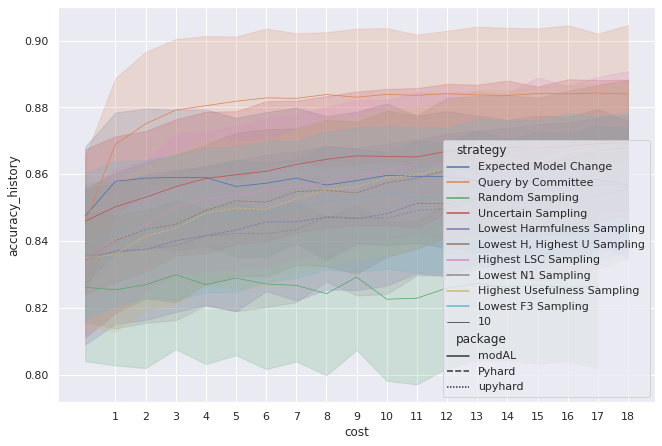

In [18]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction') & (df_all.strategy != "Lowest N2 Sampling")], size=10).set_xticks(range(1,19))

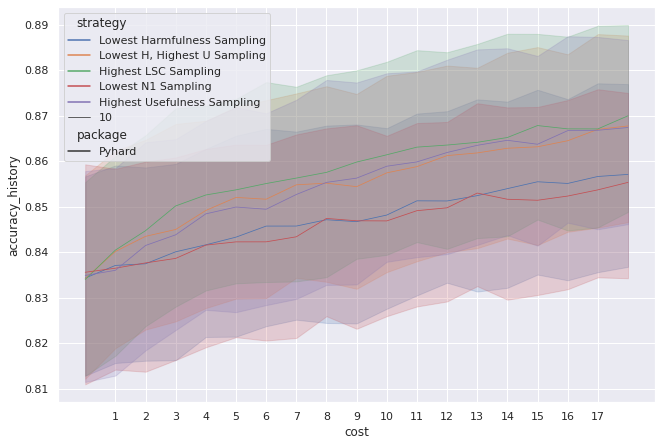

In [84]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.package == "Pyhard") & (df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction') & (df_all.strategy != "Lowest N2 Sampling")], size=10).set_xticks(range(1,18))

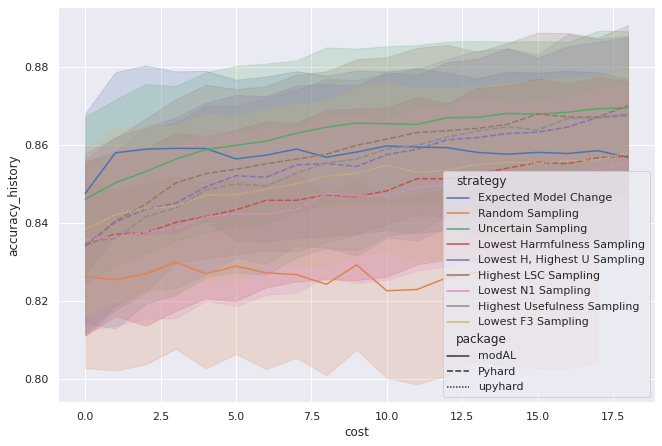

In [83]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", style="package",
             data=df_all[(df_all.package != "baseline") & (df_all.strategy != "Query by Committee") & (df_all.classifier == "RF") & (df_all.strategy != 'Expected Error Reduction') & (df_all.strategy != "Lowest N2 Sampling")])

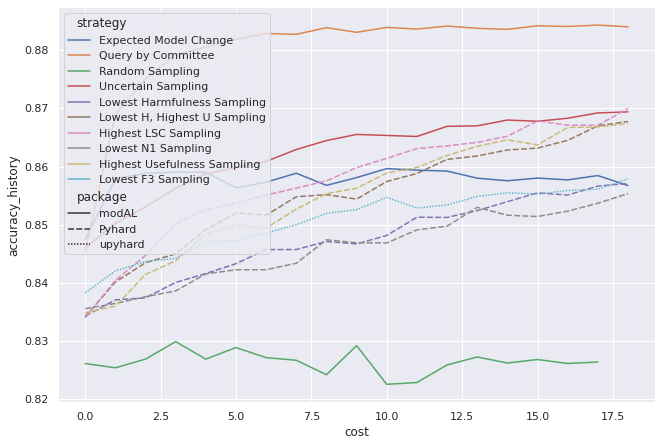

In [82]:
# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(10.7,7.27)})
_ = sns.lineplot(x="cost", y="accuracy_history",
             hue="strategy", ci=None, style="package",
             data=df_all[(df_all.classifier == "RF") & (df_all.strategy != "Lowest N2 Sampling")])

## Heatmap

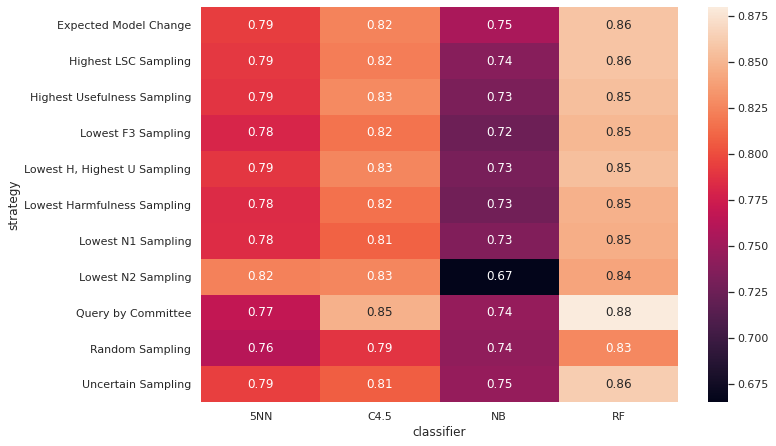

In [22]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='accuracy_history', index=['strategy'], columns='classifier')

_ = sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

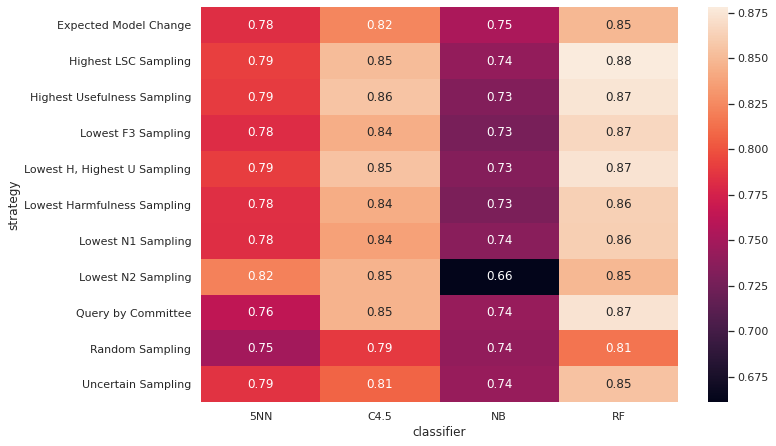

In [23]:
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction')], values='f1_history', index=['strategy'], columns='classifier')

_ = sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

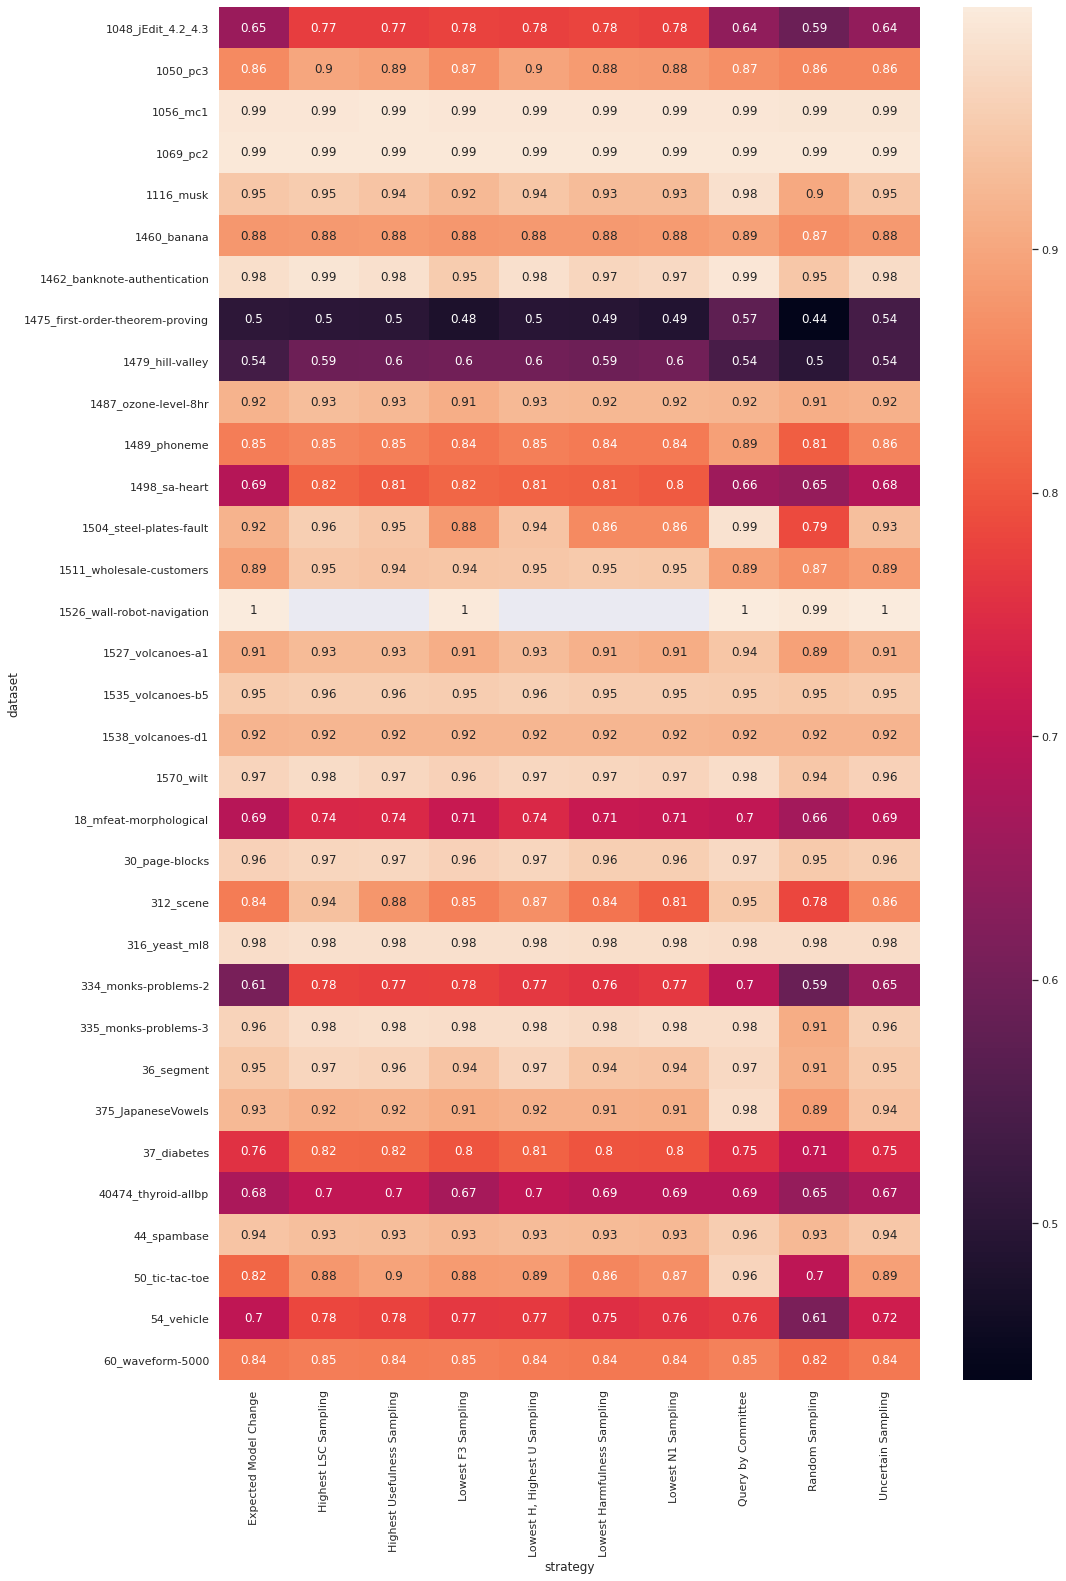

In [48]:
sns.set(rc={'figure.figsize':(15.7,25.27)})
heatmap_data = pd.pivot_table(df_all[(df_all.strategy != 'Expected Error Reduction') & (df_all.strategy != 'Lowest N2 Sampling') & (df_all.classifier == "RF")], values='f1_history', index=['dataset'], columns='strategy')

_ = sns.heatmap(heatmap_data, annot=True)
# ax = sns.heatmap(flights)

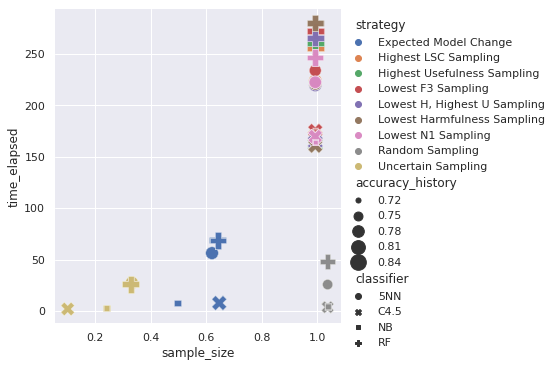

In [80]:
g = sns.relplot(
    data= df_all[(df_all.strategy != 'Query by Committee') & (df_all.strategy != 'Expected Error Reduction') & (df_all.strategy != 'Lowest N2 Sampling')].groupby(["strategy","classifier", "cost"]).mean(),
    x="sample_size", y="time_elapsed",
    hue="strategy", size="accuracy_history",
    style = "classifier",
    palette=sns.color_palette(n_colors=len(df_all.strategy.unique()) -2), sizes=(0.5, 300), alpha=0.3
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
_ = g.despine(left=True, bottom=True)

time_elapsed  sample_size  \
strategy                     classifier                              
Expected Model Change        5NN            56.296528     0.620760   
                             C4.5            7.796701     0.646815   
                             NB              7.850775     0.496853   
                             RF             68.744945     0.641788   
Highest LSC Sampling         5NN           223.695774     0.992837   
                             C4.5          169.603389     0.992682   
                             NB            264.940252     0.992642   
                             RF            255.104783     0.992642   
Highest Usefulness Sampling  5NN           222.207563     0.992837   
                             C4.5          162.001804     0.992837   
                             NB            164.983117     0.992642   
                             RF            260.209121     0.992642   
Lowest F3 Sampling           5NN           233.713729     0.992837   
                             C4.5          175.036746     0.992837   
                             NB            175.602290     0.992837   
                             RF            271.965442     0.992837   
Lowest H, Highest U Sampling 5NN           219.576141     0.992837   
                             C4.5          164.179271     0.992837   
                             NB            166.985903     0.992642   
                             RF            265.482157     0.992642   
Lowest Harmfulness Sampling  5NN           220.806396     0.992837   
                             C4.5          160.507164     0.992837   
                             NB            170.675768     0.992642   
                             RF            279.860282     0.992642   
Lowest N1 Sampling           5NN           222.308045     0.992837   
                             C4.5          169.581988     0.992642   
                             NB            164.160633     0.992642   
                             RF            246.434505     0.992642   
Query by Committee           5NN           783.294050     2.710812   
                             C4.5           77.370397     2.710812   
                             NB             82.698060     2.710812   
                             RF           1110.303763     2.710812   
Random Sampling              5NN            25.738409     1.037437   
                             C4.5            3.720984     1.037437   
                             NB              4.411481     1.037437   
                             RF             47.826894     1.037437   
Uncertain Sampling           5NN            27.307936     0.331663   
                             C4.5            1.977887     0.100583   
                             NB              2.693447     0.240451   
                             RF             26.101846     0.327425   

                                         accuracy_history  f1_history  cost  
strategy                     classifier                                      
Expected Model Change        5NN                 0.793032    0.782477   9.0  
                             C4.5                0.823880    0.823570   9.0  
                             NB                  0.754974    0.752859   9.0  
                             RF                  0.857605    0.848669   9.0  
Highest LSC Sampling         5NN                 0.790987    0.791029   9.0  
                             C4.5                0.821673    0.851736   9.0  
                             NB                  0.738402    0.741042   9.0  
                             RF                  0.857571    0.878159   9.0  
Highest Usefulness Sampling  5NN                 0.789157    0.789903   9.0  
                             C4.5                0.827175    0.855847   9.0  
                             NB                  0.732305    0.732792   9.0  
                             RF                  0.854828    0.874326   9.0  
Lowest F